In [3]:
!pip uninstall EEG-Artifact-Removal

Found existing installation: EEG-Artifact-Removal 0.0.2
Uninstalling EEG-Artifact-Removal-0.0.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/EEGArtifactRemoval/*
    /usr/local/lib/python3.7/dist-packages/EEG_Artifact_Removal-0.0.2.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled EEG-Artifact-Removal-0.0.2


In [4]:
!pip install git+https://github.com/curais/EEG-Artifact-Removal.git

  Cloning https://github.com/curais/EEG-Artifact-Removal.git to /tmp/pip-req-build-kwys0s6o
  Running command git clone -q https://github.com/curais/EEG-Artifact-Removal.git /tmp/pip-req-build-kwys0s6o
  Created wheel for EEG-Artifact-Removal: filename=EEG_Artifact_Removal-0.0.2-py3-none-any.whl size=7204 sha256=a68b598232a23159187133cc61919dc746537c09f07a25a4279fc35c79e4e709
  Stored in directory: /tmp/pip-ephem-wheel-cache-m_0swquv/wheels/5b/fc/83/ff4a73a27de8d653d7288b559d142c9f7fef14dc2b1b065e9b
Successfully built EEG-Artifact-Removal


In [ ]:
!pip uninstall httplib2
!pip install httplib2==0.15.0
!pip install mpu

Uninstalling httplib2-0.17.4:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/httplib2-0.17.4.dist-info/*
    /usr/local/lib/python3.7/dist-packages/httplib2/*
Proceed (y/n)? y
  Successfully uninstalled httplib2-0.17.4
     |████████████████████████████████| 102kB 6.5MB/s 
     |████████████████████████████████| 71kB 5.2MB/s 


In [ ]:
!wget -r -N -c -np https://physionet.org/files/motion-artifact/1.0.0/
import zipfile
with zipfile.ZipFile('/content/physionet.org/files/motion-artifact/1.0.0/EEG-csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/eeg_data')
!rm -rf /content/physionet.org/

--2021-06-27 17:42:14--  https://physionet.org/files/motion-artifact/1.0.0/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘physionet.org/files/motion-artifact/1.0.0/index.html’

physionet.org/files     [ <=>                ]  11.71K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2021-06-27 17:42:15 (287 MB/s) - ‘physionet.org/files/motion-artifact/1.0.0/index.html’ saved [11995]

Loading robots.txt; please ignore errors.
--2021-06-27 17:42:15--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 22 [text/plain]
Saving to: ‘physionet.org/robots.txt’

physionet.org/robot 100%[===================>]      22  --.-KB/s    in 0s      

2021-06-27 17:42:15 (4.13 MB/s) - ‘physionet.org/robots.txt’ saved 

In [ ]:
!pip install -U -q PyDrive

In [ ]:
from EEGArtifactRemoval.preprocessing import get_trials, separate_data

pathstrings = ['/content/eeg_data/Trial{i}.csv'.format(i=i+1) for i in range(1)]
clean,noisy = get_trials(pathstrings, 256, 2048, 8,1,eyes=True,muscles=False )
noisy.shape

(1, 122880, 1)

In [ ]:
(train_data,train_labels,test_data,test_labels) = separate_data(clean,noisy,400,20,save=False)

IndexError: ignored

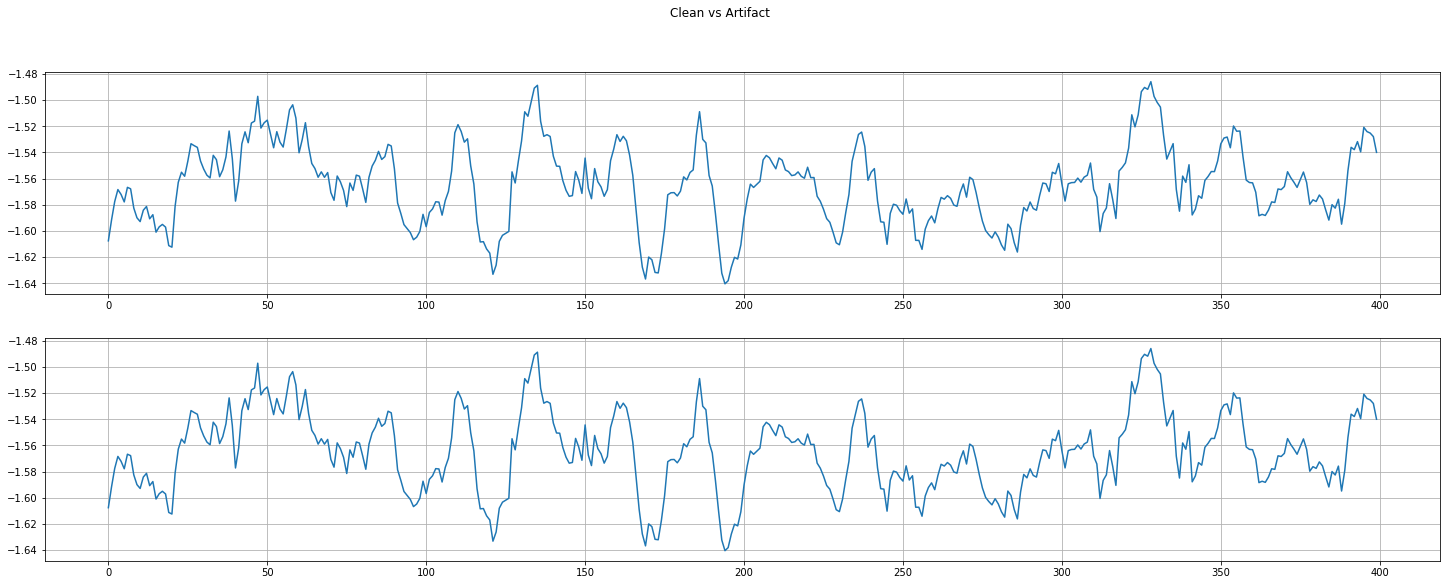

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True)


index=620

fig.set_size_inches(25, 9)
fig.suptitle('Clean vs Artifact')

ax1.plot(test_data[index], label="Contaminated")
ax1.grid()

ax2.plot(train_data[index], label='Prediction')
ax2.grid()


plt.show()

In [ ]:
import pickle
import mpu
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


mpu.io.write("full_recording_clean.pickle",clean)
mpu.io.write("full_recording_noisy.pickle",noisy)

filename = "full_recording_clean" + '.pickle'
file = drive.CreateFile({'title' : filename})
file.SetContentFile(filename)
file.Upload()

filename = "full_recording_noisy" + '.pickle'
file = drive.CreateFile({'title' : filename})
file.SetContentFile(filename)
file.Upload()

In [ ]:
(train_data,train_labels,test_data,test_labels) = separate_data(clean,noisy,400,20,save=True)

IndexError: ignored

In [ ]:
!rm -rf /content/eeg_data/

In [ ]:
import pickle
import mpu
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
data = ['train_data','train_labels','test_data','test_labels']

for string in data:
  filename = string + '.pickle'
  file = drive.CreateFile({'title' : filename})
  file.SetContentFile(filename)
  file.Upload()



In [ ]:
from EEGArtifactRemoval.models import UnidimensionalResCNN

model = UnidimensionalResCNN(400)
model.show_summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 400, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 400, 32)      192         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 400, 32)      128         conv1d[0][0]                     
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 400, 32)      0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
history = model.train(train_data, train_labels, test_data, test_labels)

Epoch 1/10
6124/6124 [==============================] - 154s 19ms/step - loss: 0.0235 - snr_metric: 19.3176 - val_loss: 0.0084 - val_snr_metric: 20.6372
Epoch 2/10
6124/6124 [==============================] - 117s 19ms/step - loss: 0.0031 - snr_metric: 25.7525 - val_loss: 0.0055 - val_snr_metric: 24.2545
Epoch 3/10
6124/6124 [==============================] - 117s 19ms/step - loss: 0.0024 - snr_metric: 27.0110 - val_loss: 0.0047 - val_snr_metric: 25.1854
Epoch 4/10
6124/6124 [==============================] - 117s 19ms/step - loss: 0.0018 - snr_metric: 28.1012 - val_loss: 0.0057 - val_snr_metric: 21.9511
Epoch 5/10
6124/6124 [==============================] - 117s 19ms/step - loss: 0.0018 - snr_metric: 28.4544 - val_loss: 0.0068 - val_snr_metric: 23.0753
Epoch 6/10
6124/6124 [==============================] - 117s 19ms/step - loss: 0.0014 - snr_metric: 29.2887 - val_loss: 0.0059 - val_snr_metric: 25.0741
Epoch 7/10
6124/6124 [==============================] - 117s 19ms/step - loss: 0.0

In [ ]:
result = model.evaluate(test_data)

1531/1531 [==============================] - 9s 6ms/step


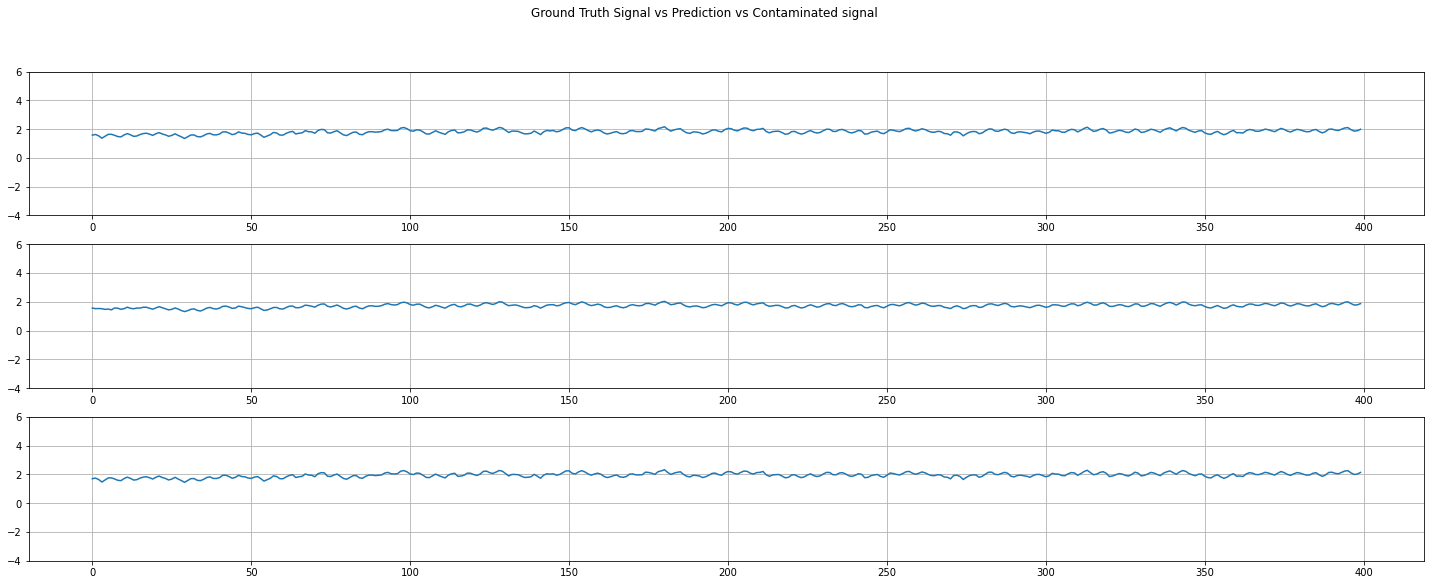

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True)
plt.ylim(-4,6)

index=140

fig.set_size_inches(25, 9)
fig.suptitle('Ground Truth Signal vs Prediction vs Contaminated signal')

ax1.plot(test_data[index], label="Contaminated")
ax1.grid()

ax2.plot(result[index].flatten(), label='Prediction')
ax2.grid()

ax3.plot(test_labels[index], label='True',)
ax3.grid()


plt.show()

## Save weights

In [ ]:
model.save('1D-ResCNN.h5')

weights_file = drive.CreateFile({'title' : '1D-ResCNN.h5'})
weights_file.SetContentFile('1D-ResCNN.h5')
weights_file.Upload()

# Simple LSTM

In [ ]:
from EEGArtifactRemoval.models import SimpleLSTM

model = SimpleLSTM(400)
model.show_summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 400, 100)          40800     
_________________________________________________________________
time_distributed (TimeDistri (None, 400, 50)           5050      
_________________________________________________________________
dense_3 (Dense)              (None, 400, 32)           1632      
_________________________________________________________________
dense_4 (Dense)              (None, 400, 1)            33        
Total params: 47,515
Trainable params: 47,515
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.train(train_data, train_labels, test_data, test_labels)

Epoch 1/10
6124/6124 [==============================] - 1673s 273ms/step - loss: 0.0374 - snr_metric: 23.5098 - val_loss: 0.0072 - val_snr_metric: 29.9236
Epoch 2/10
6124/6124 [==============================] - 1671s 273ms/step - loss: 0.0024 - snr_metric: 26.9744 - val_loss: 0.0070 - val_snr_metric: 28.8514
Epoch 3/10
6124/6124 [==============================] - 1663s 272ms/step - loss: 0.0022 - snr_metric: 27.1549 - val_loss: 0.0067 - val_snr_metric: 29.1750
Epoch 4/10
6124/6124 [==============================] - 1645s 269ms/step - loss: 0.0020 - snr_metric: 27.5120 - val_loss: 0.0066 - val_snr_metric: 29.9212
Epoch 5/10
6124/6124 [==============================] - 1644s 269ms/step - loss: 0.0019 - snr_metric: 27.5755 - val_loss: 0.0062 - val_snr_metric: 25.4013
Epoch 6/10
6124/6124 [==============================] - 1632s 266ms/step - loss: 0.0014 - snr_metric: 29.1517 - val_loss: 0.0039 - val_snr_metric: 29.1825
Epoch 7/10
6124/6124 [==============================] - 1627s 266ms/st

In [ ]:
result = model.evaluate(test_data)

1531/1531 [==============================] - 61s 40ms/step


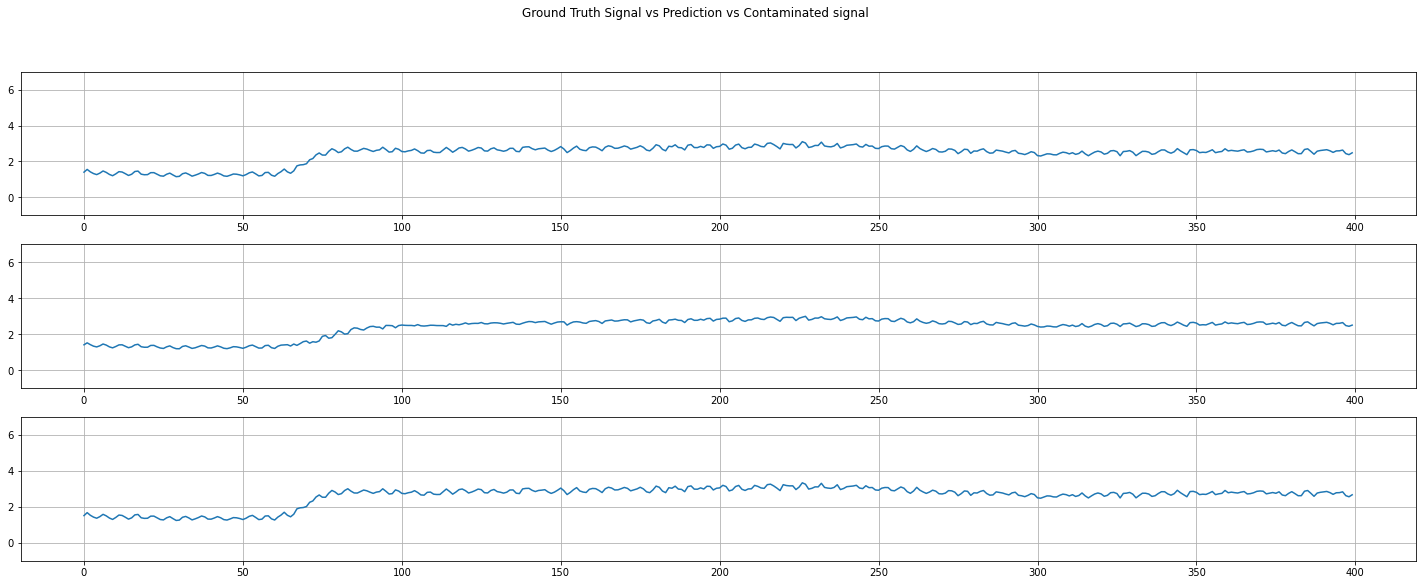

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True)
plt.ylim(-1,7)

index=20

fig.set_size_inches(25, 9)
fig.suptitle('Ground Truth Signal vs Prediction vs Contaminated signal')

ax1.plot(test_data[index], label="Contaminated")
ax1.grid()

ax2.plot(result[index].flatten(), label='Prediction')
ax2.grid()

ax3.plot(test_labels[index], label='True',)
ax3.grid()


plt.show()

In [ ]:
model.save('SimpleLSTM.h5')
weights_file = drive.CreateFile({'title' : 'SimpleLSTM.h5'})
weights_file.SetContentFile('SimpleLSTM.h5')
weights_file.Upload()